In [1]:
import deepSI
import numpy as np

class DuffingOscillator(deepSI.System_deriv):
    def __init__(self):
        super(DuffingOscillator, self).__init__(nx=2, dt=0.1)
        self.alpha = 1
        self.beta = 5
        self.gamma = 8
        self.delta = 0.02
        self.omega = 0.5

    def deriv(self,x,u):
        z1,z2 = x
        dz1 = self.gamma*u - self.delta*z1 - self.alpha*z2 - self.beta*(z2**3)
        dz2 = z1
        return [dz1,dz2]

    def h(self,x,u):
        return x[1]

In [2]:

from matplotlib import pyplot as plt
dt = np.arange(10000)*0.1
u = np.cos(0.5*dt)

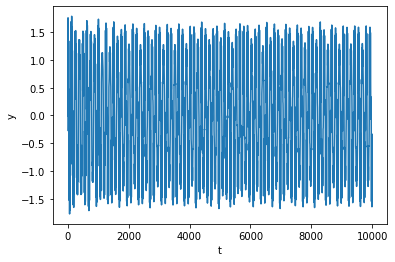

In [3]:
sys = DuffingOscillator()
data = sys.apply_experiment(deepSI.System_data(u=u))
data.plot()

In [4]:
ss_enc = deepSI.fit_systems.SS_encoder(nx=6, na=3, nb=3)
train, test = data.train_test_split(split_fraction=0.2)
train, val  = train.train_test_split(split_fraction=0.25)

ss_enc.fit(train_sys_data=train, val_sys_data=val, epochs=100, batch_size=256, loss_kwargs={'nf':50})

Initilizing the model and optimizer
Size of the training array =  4.8 MB
N_training_samples = 5948, batch_size = 256, N_batch_updates_per_epoch = 23
Initial Validation sim-NRMS= 0.9568826874115373


  0%|          | 0/100 [00:00<?, ?it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.4550488811719856
Epoch    1, sqrt loss   0.614, Val sim-NRMS  0.455, Time Loss: 80.6%, data: 0.3%, val: 19.0%,  8.5 batches/sec
########## New lowest validation loss achieved ########### sim-NRMS = 0.44658962681844194
Epoch    2, sqrt loss  0.4675, Val sim-NRMS 0.4466, Time Loss: 80.8%, data: 0.3%, val: 18.9%,  8.7 batches/sec
########## New lowest validation loss achieved ########### sim-NRMS = 0.4441570321719683
Epoch    3, sqrt loss  0.4597, Val sim-NRMS 0.4442, Time Loss: 80.9%, data: 0.2%, val: 18.8%,  9.0 batches/sec
########## New lowest validation loss achieved ########### sim-NRMS = 0.4437323679249834
Epoch    4, sqrt loss  0.4573, Val sim-NRMS 0.4437, Time Loss: 80.4%, data: 0.2%, val: 19.3%,  8.7 batches/sec
Epoch    5, sqrt loss  0.4547, Val sim-NRMS 0.4438, Time Loss: 79.9%, data: 0.2%, val: 19.8%,  8.8 batches/sec
Epoch    6, sqrt loss  0.4528, Val sim-NRMS  0.444, Time Loss: 80.1%, data: 0.2%, val: 1

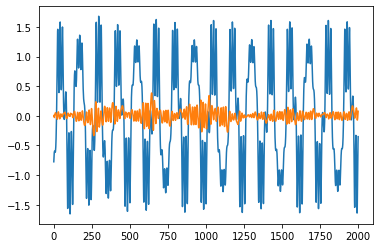

In [6]:
test_ss_enc = ss_enc.apply_experiment(test)

plt.plot(test.y)
plt.plot(test.y - test_ss_enc.y)

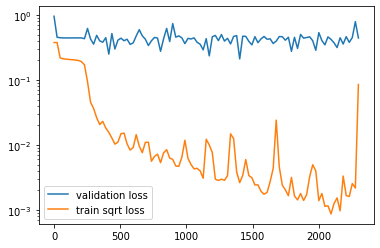

In [9]:
ss_enc.checkpoint_load_system('_last')
plt.semilogy(ss_enc.batch_id,ss_enc.Loss_val,label='validation loss')
plt.semilogy(ss_enc.batch_id,ss_enc.Loss_train,label='train sqrt loss')
plt.legend()